# Q1: Newton Fractals

## a) Newton''s Method

Newton's Method to find roots uses the following iterative step:

$$x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}$$

In [2]:
def newton(x0, f, gf):
    x = x0
    maxiter = 1000
    for i in range(maxiter):
        #print("x{}: {}".format(i, x))
        if abs(f(x)-0) <= 1e-5:
            return(x)
        else:
            x -= f(x)/gf(x)
    return(float("inf")) # root not found

Roots are $i$ and $-i$

In [5]:
def f(x):
    return(x**2+1)

def gf(x):
    return(2*x)

## b) Range of Convergence

In [6]:
newton(1j**-1,f,gf)

-1j

In [7]:
newton(0.997j,f,gf)

1.000004513540622j

In [8]:
newton(1.00316j,f,gf)

1.000004977072451j

In [9]:
newton(0.81,f,gf)

inf

Fails:      
- any real number initial point
- hits division by 0 (hits 1)

x1:
- 1.00316j, 0.997j
- -1.00316j, -0.997j

x2:
- slightly outside x1

## c) Complex Roots
$$x^3-1$$

**Analytical Method**     

$$x^3-1 = 0$$
$$(x-1)(x^2+x+1)$$

Therefore the roots are at

$$x = 1$$
$$or$$
$$x = \frac{-1\pm \sqrt{1-4}}{2}$$

$$x = 1$$
$$or$$
$$x = -\frac{1+i\sqrt{3}}{2}$$
$$or$$
$$x = -\frac{1-i\sqrt{3}}{2}$$

**Numerical Method**    

In [13]:
def f2(x):
    return(x**3-1)

def gf2(x):
    return(3*x**2)

In [14]:
newton(0.1j,f2,gf2)

(1.0000000000035045-7.067308796863926e-11j)

In [11]:
newton(1j,f2,gf2)

(-0.49999999628902975+0.8660253983385868j)

In [12]:
newton(-1j,f2,gf2)

(-0.49999999628902975-0.8660253983385868j)

## d) Range of Convergence

In [28]:
import numpy as np
import math
import matplotlib.pyplot as plt

sols = [[0]*100 for _ in range(100)]

x = np.linspace(-1,1,100)
for aind, a in enumerate(x):
    for bind, b in enumerate(x):
        sols[aind][bind] = newton(a+b*1j, f2,gf2)

In [56]:
x1 = 1
x2 = -(1+1j*math.sqrt(3))/2
x3 = -(1-1j*math.sqrt(3))/2

R = np.zeros([100,100])
G = np.zeros([100,100])
B = np.zeros([100,100])

for rind, r in enumerate(sols):
    for cind, v in enumerate(r):
        if abs(v-x1) < 1e-5:
            R[rind][cind] = 1
        elif abs(v-x2) < 1e-5:
            G[rind][cind] = 1
        elif abs(v-x3) < 1e-5:
            B[rind][cind] = 1

## e) Visualize

In [57]:
A = np.zeros([100,100,3])

A[:,:,0] = R
A[:,:,1] = G
A[:,:,2] = B

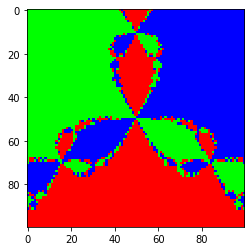

In [58]:
plt.imshow(A)

## f) Optional: More Roots

# Q4: Laplace Transform
$$L{f}(s) = \int_0^\infty e^{-st}f(t) dt$$

## a) Linear Operator

An operator is linear if it meets the following conditions:

1) $L(a*x) = a*L(x)$             
2) $L(x + x') = L(x) + L(x')$             

**Proving (1)**       
$$L(a*x) = \int_0^\infty e^{-sf}a*f(t) dt$$  
Because $a$ is a scalar that is not dependent on variable $t$
$$L(a*x) = a\int_0^\infty e^{-sf}f(t) dt$$  
Thus,
$$L(a*x) = a*L(x)$$

**Proving (2)**       
$$L(x + x') = \int_0^\infty e^{-sf}(f(x)+f(x)) dt$$  
$$L(x + x') = \int_0^\infty e^{-sf}f(x) + e^{-sf}f(x') dt$$  
$$L(x + x') = \int_0^\infty e^{-sf}f(x)dt + \int_0^\infty e^{-sf}f(x')dt$$  
Thus,
$$L(x + x') = L(x) + L(x')$$

Thus, Laplace Transform is a linear operator.


## b) Always Exist?

The function $f(t)$ must always be integratable for the Laplace transform to exist.

Thus, the function must be continuous in the positive domain (from $0$ to $\infty$).

Additionally, $\int_0^\infty e^{-st}f(t) dt < \infty$.

Thus, any function that has infinity on a positive real number cannot have a Laplace transform. For example($tan(x)$ or ($\frac{1}{x}$))

Additionally, a function that has an order of growth too large for the damping factor $e^{-st}$ (ex: $e^{e^t}$) will not have a convergent integral (integral results in $/infty$). Thus, the function must have an order of growth less than or equal to exponential.

In summary, for a function $f(t)$ to have a Laplace transform, it must be expressible in the form $Ce^{kt}$ where $C$ and $k$ are scalar values.

## c) Step Function

$$u(t) = \left\{
\begin{array}{ll}
      1 & t \geq 0 \\
      0 & otherwise
\end{array} 
\right.$$

$$L{u}(t) = \int_0^\infty e^{-st}(1) dt$$
$$L{u}(t) = \frac{e^{-st}}{-s} \bigg\rvert_0^\infty$$
$$L{u}(t) = \frac{e^{-s(\infty)}}{-s} - \frac{e^{-s(0)}}{-s}$$

For this function to converge, the term including infinity needs to go to $0$. Thus $$s > 0$$.

Given this constraint,

$$L{u}(t) = - \frac{1}{-s}$$
$$L{u}(t) = \frac{1}{s}$$

## d) LT of Derivative

$$Y(s) = \int_0^\infty e^{-st}y'(t) dt$$

$$L(y'(t)) = \int_0^\infty e^{-st}y(t) dt$$
Using integration by parts, we can rewrite this as:         
$$= y(t)e^{-st}\bigg\rvert_0^\infty + s\int_0^\infty y(t)e^{-st} dt$$
$$= y(\infty)e^{-s(\infty)}- y(0)e^{-s(0)}+ s\int_0^\infty y(t)e^{-st} dt$$

Assuming that the Laplace transform exists for function $y(t)$, we know that $y(\infty)e^{-s(\infty)} = 0$. Thus,
$$=  -y(0)+ s\int_0^\infty y(t)e^{-st} dt$$


Simplified, this becomes
$$L(y'(t)) =  -y(0)+ sY(s)$$


## e) IVP

$$y'+ y=u(t)$$
$$y(0) = 1$$

Taking the Laplace transform of both sides of equation 1
$$-y(0)+sY(s) + Y(s) = \frac{e^{-s}}{s}$$

Subbing in the value for $y(0)$ and rearranging:
$$Y(s) = (\frac{e^{-s}}{s} + 1)/(s+1)$$


## f) (Optional) Inv LT

## g) Advatage of LT for ODE?

It transforms calculus problems (involving differentials and integration) into algebra problems (additions and coefficients). This makes ODEs much easier to solve when they are expressed in the transformed versions of themselves.

# Reflection

Math models everywhere.

There are dialects of math that are translatable between each other (polar, imaginary sinusodal, transforms). This is important because some things are easier to express in specific dialects, and are more easily to manipulate/ reason about/ solve in those dialects.

